In [1]:
from soview import *
import pandas as pd
import datetime
import palettable
import squarify

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.8 pynndescent==0.5.5
squidpy==1.1.2


In [2]:
cmp = palettable.cartocolors.qualitative.Bold_10.mpl_colors
cmp2 = palettable.cartocolors.qualitative.Safe_10.mpl_colors
cmp_tissue = palettable.cartocolors.qualitative.Prism_10.mpl_colors
cmp_omics = palettable.colorbrewer.qualitative.Set2_7.mpl_colors
cmp_omics = [cmp_omics[3],cmp_omics[4],cmp_omics[0],cmp_omics[1],cmp_omics[2]]
cmp_biotech = palettable.colorbrewer.qualitative.Pastel1_9.mpl_colors
# trans_color = cmp_omics[2]
cmp_tf = palettable.colorbrewer.qualitative.Dark2_8.mpl_colors
# prote_color = cmp_omics[3]

In [3]:
method_dataset = pd.read_feather('method_dataset.feather')

## show frequency of all methods

In [11]:
dataset_list = []
for c in method_dataset.columns:
    if 'dataset' in c:
        dataset_list.append(c)

In [12]:
method_dataset_sub = method_dataset[dataset_list]

In [13]:
method_dataset_sub

,dataset_1,dataset_2,dataset_6,dataset_11,dataset_15,dataset_18,dataset_19,dataset_20,dataset_21,dataset_22,...,dataset_34,dataset_35,dataset_36,dataset_38,dataset_76,dataset_78,dataset_82,dataset_90,dataset_91,dataset_93
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
62,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
method_dataset_sub = method_dataset_sub.astype('float').astype('int')

In [15]:
method_dataset_sub['type'] = method_dataset['type']

In [16]:
method_dataset_sub

,dataset_1,dataset_2,dataset_6,dataset_11,dataset_15,dataset_18,dataset_19,dataset_20,dataset_21,dataset_22,...,dataset_35,dataset_36,dataset_38,dataset_76,dataset_78,dataset_82,dataset_90,dataset_91,dataset_93,type
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,SE analysis
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,SE analysis
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,SE analysis
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,SE analysis
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,SE analysis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SE analysis
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,SE analysis
62,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Alignment
63,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,SE analysis


In [17]:
dataset_count = method_dataset_sub.groupby('type').agg('sum')

In [18]:
dataset_count

,dataset_1,dataset_2,dataset_6,dataset_11,dataset_15,dataset_18,dataset_19,dataset_20,dataset_21,dataset_22,...,dataset_34,dataset_35,dataset_36,dataset_38,dataset_76,dataset_78,dataset_82,dataset_90,dataset_91,dataset_93
type,,,,,,,,,,,,,,,,,,,,,
Alignment,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Cell-type annotation,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
Expression prediction,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
Framework,1,1,1,0,0,0,0,0,0,1,...,2,1,1,2,0,4,0,0,1,0
Gene imputation,0,0,0,0,0,0,0,0,0,0,...,2,3,0,0,0,1,0,0,5,0
Interactions,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
Label-free Segmentation,0,0,0,0,0,0,0,0,0,0,...,2,2,1,1,0,0,0,0,1,0
Resolution enhancement,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
SE analysis,1,5,2,0,1,0,1,0,0,7,...,3,0,0,0,0,5,0,1,1,2


In [20]:
cmp_biotech_name = palettable.colorbrewer.qualitative.Paired_12.mpl_colors

In [ ]:
dataset_count

In [23]:
color_use = [cmp_biotech_name[biotech_name_order.index(bn)] for bn in dataset_count['biotech_name']]



KeyError: 'biotech_name'

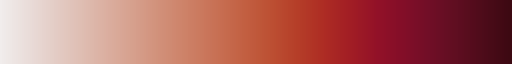

In [42]:
cmp

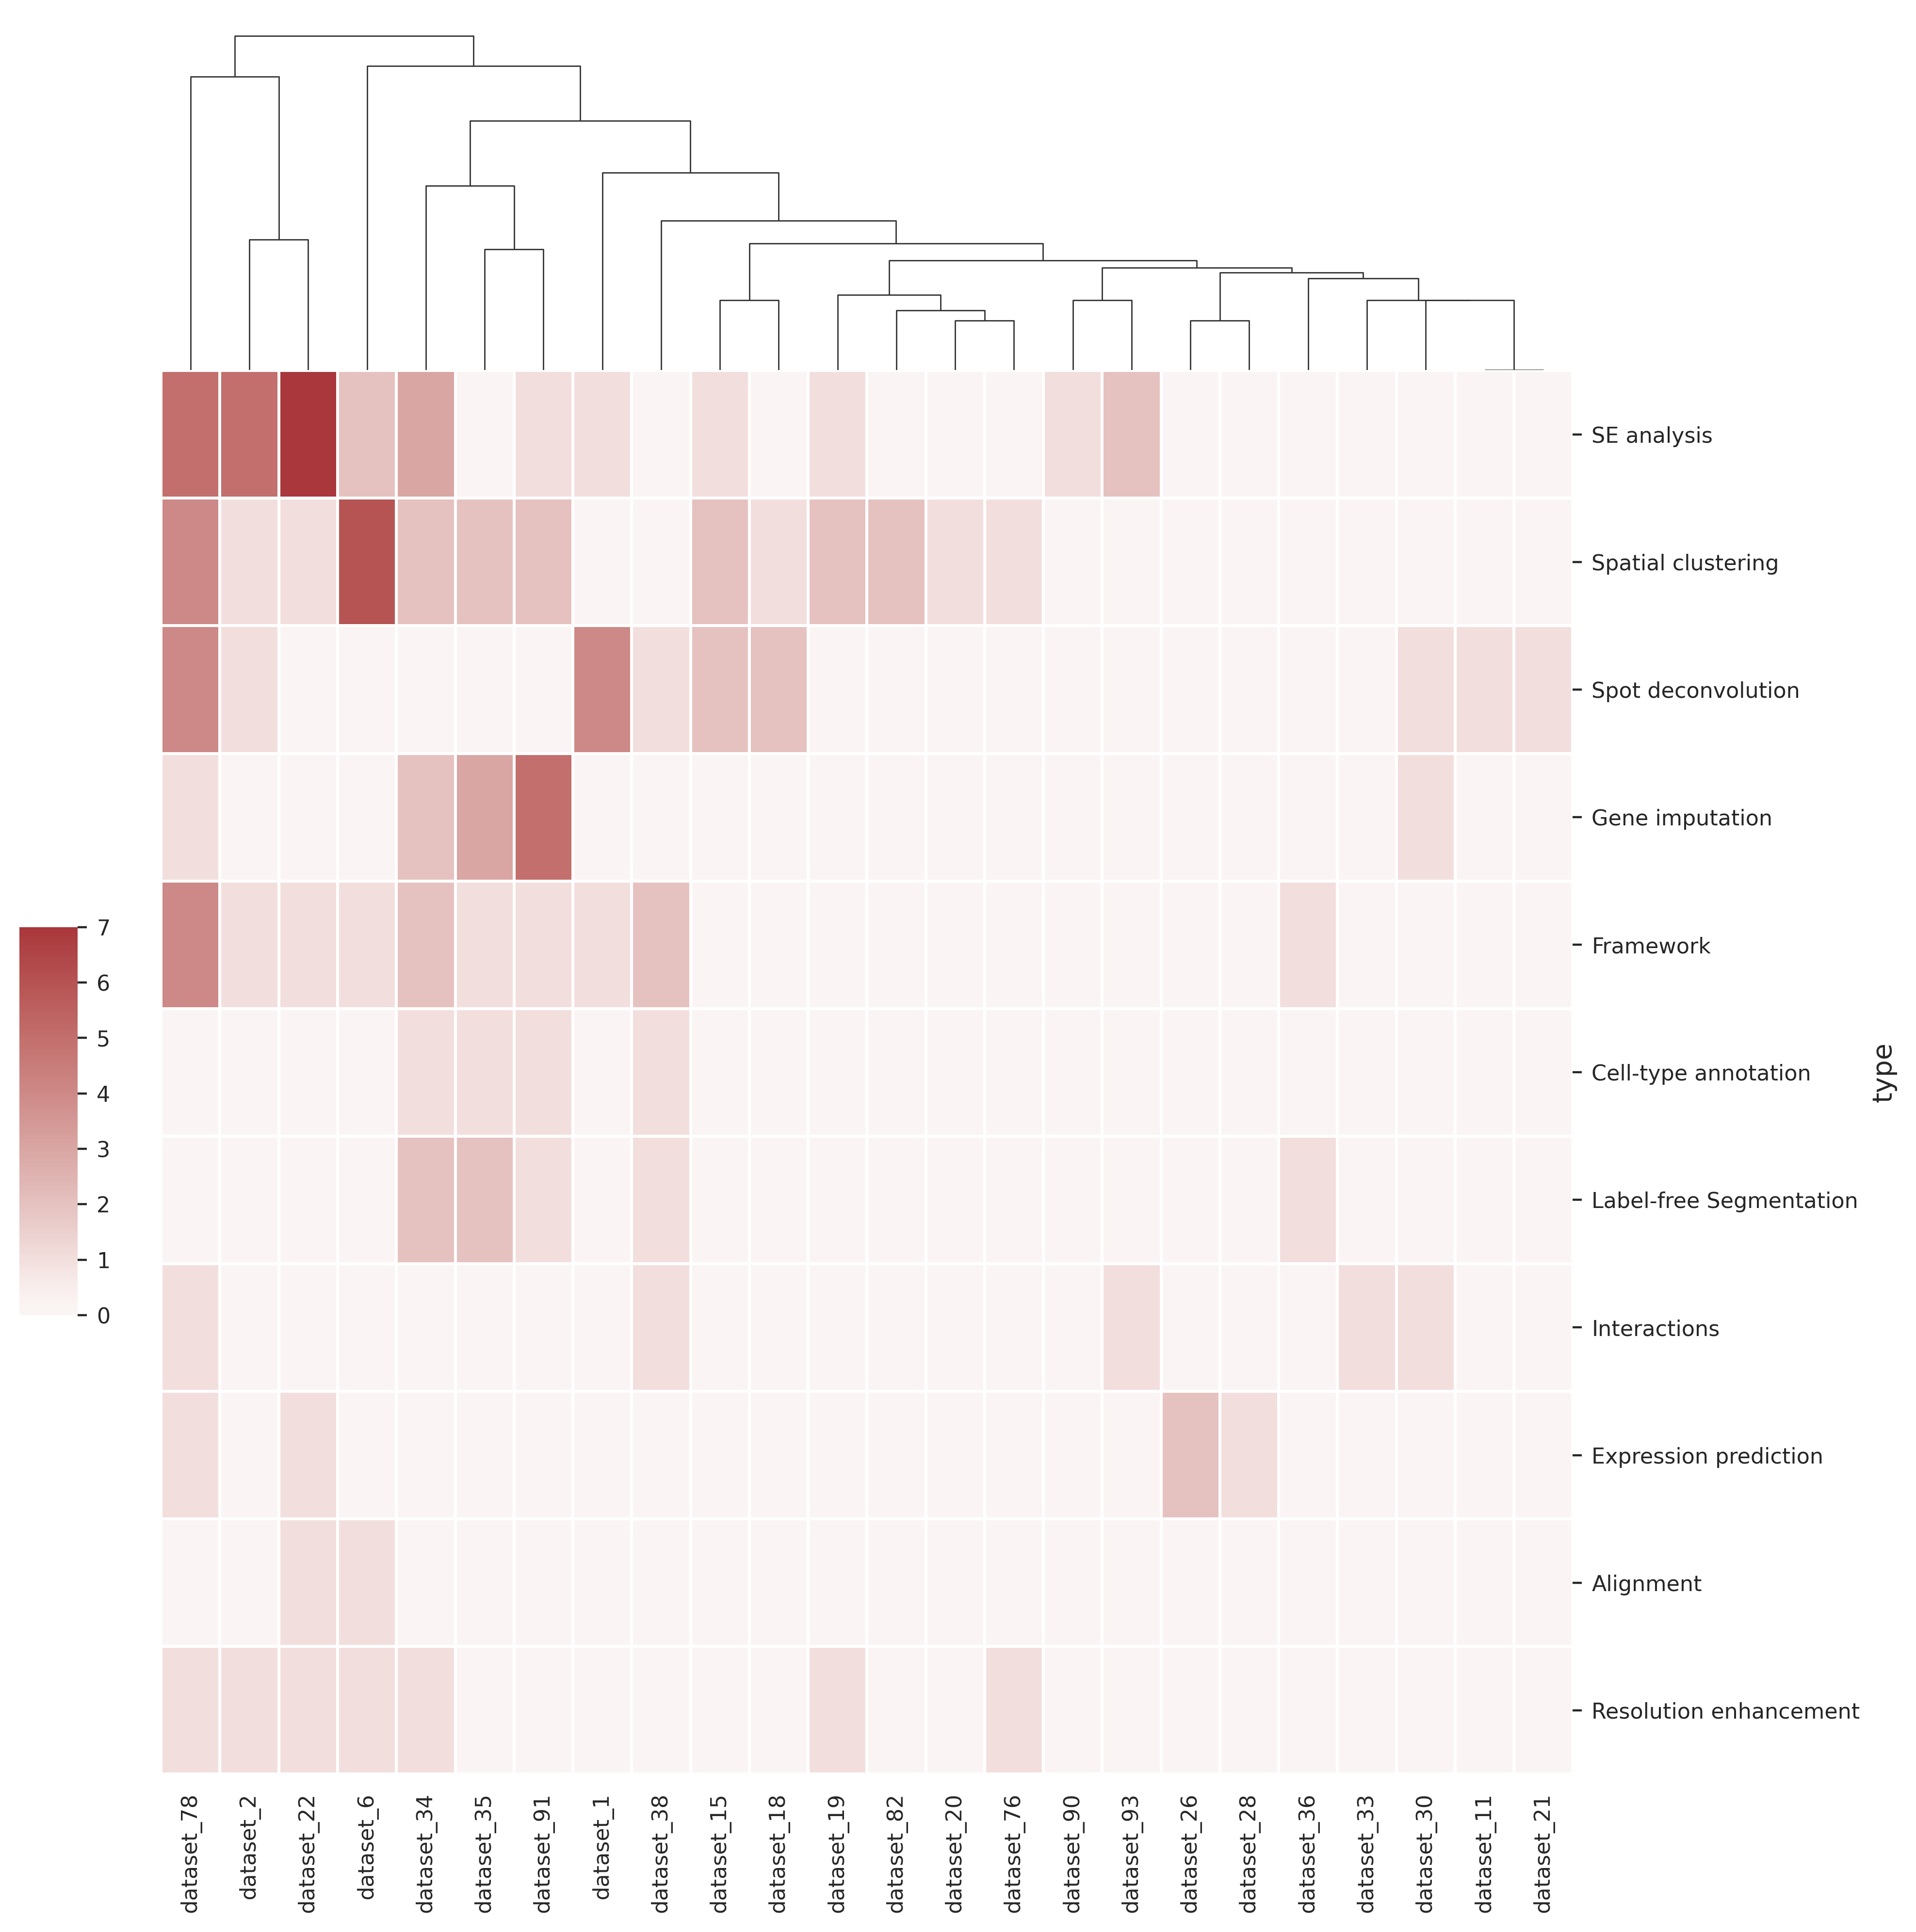

In [45]:
# cmp = palettable.cmocean.sequential.Amp_20.mpl_colormap
g = sns.clustermap(dataset_count, 
                   center=0, 
                   cmap='vlag',
                   # row_colors=network_colors, col_colors=network_colors,
                   # col_colors=cmp_biotech_name,
                   square=True,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, 
                   # figsize=(12, 13)
                  )

g.ax_row_dendrogram.remove()

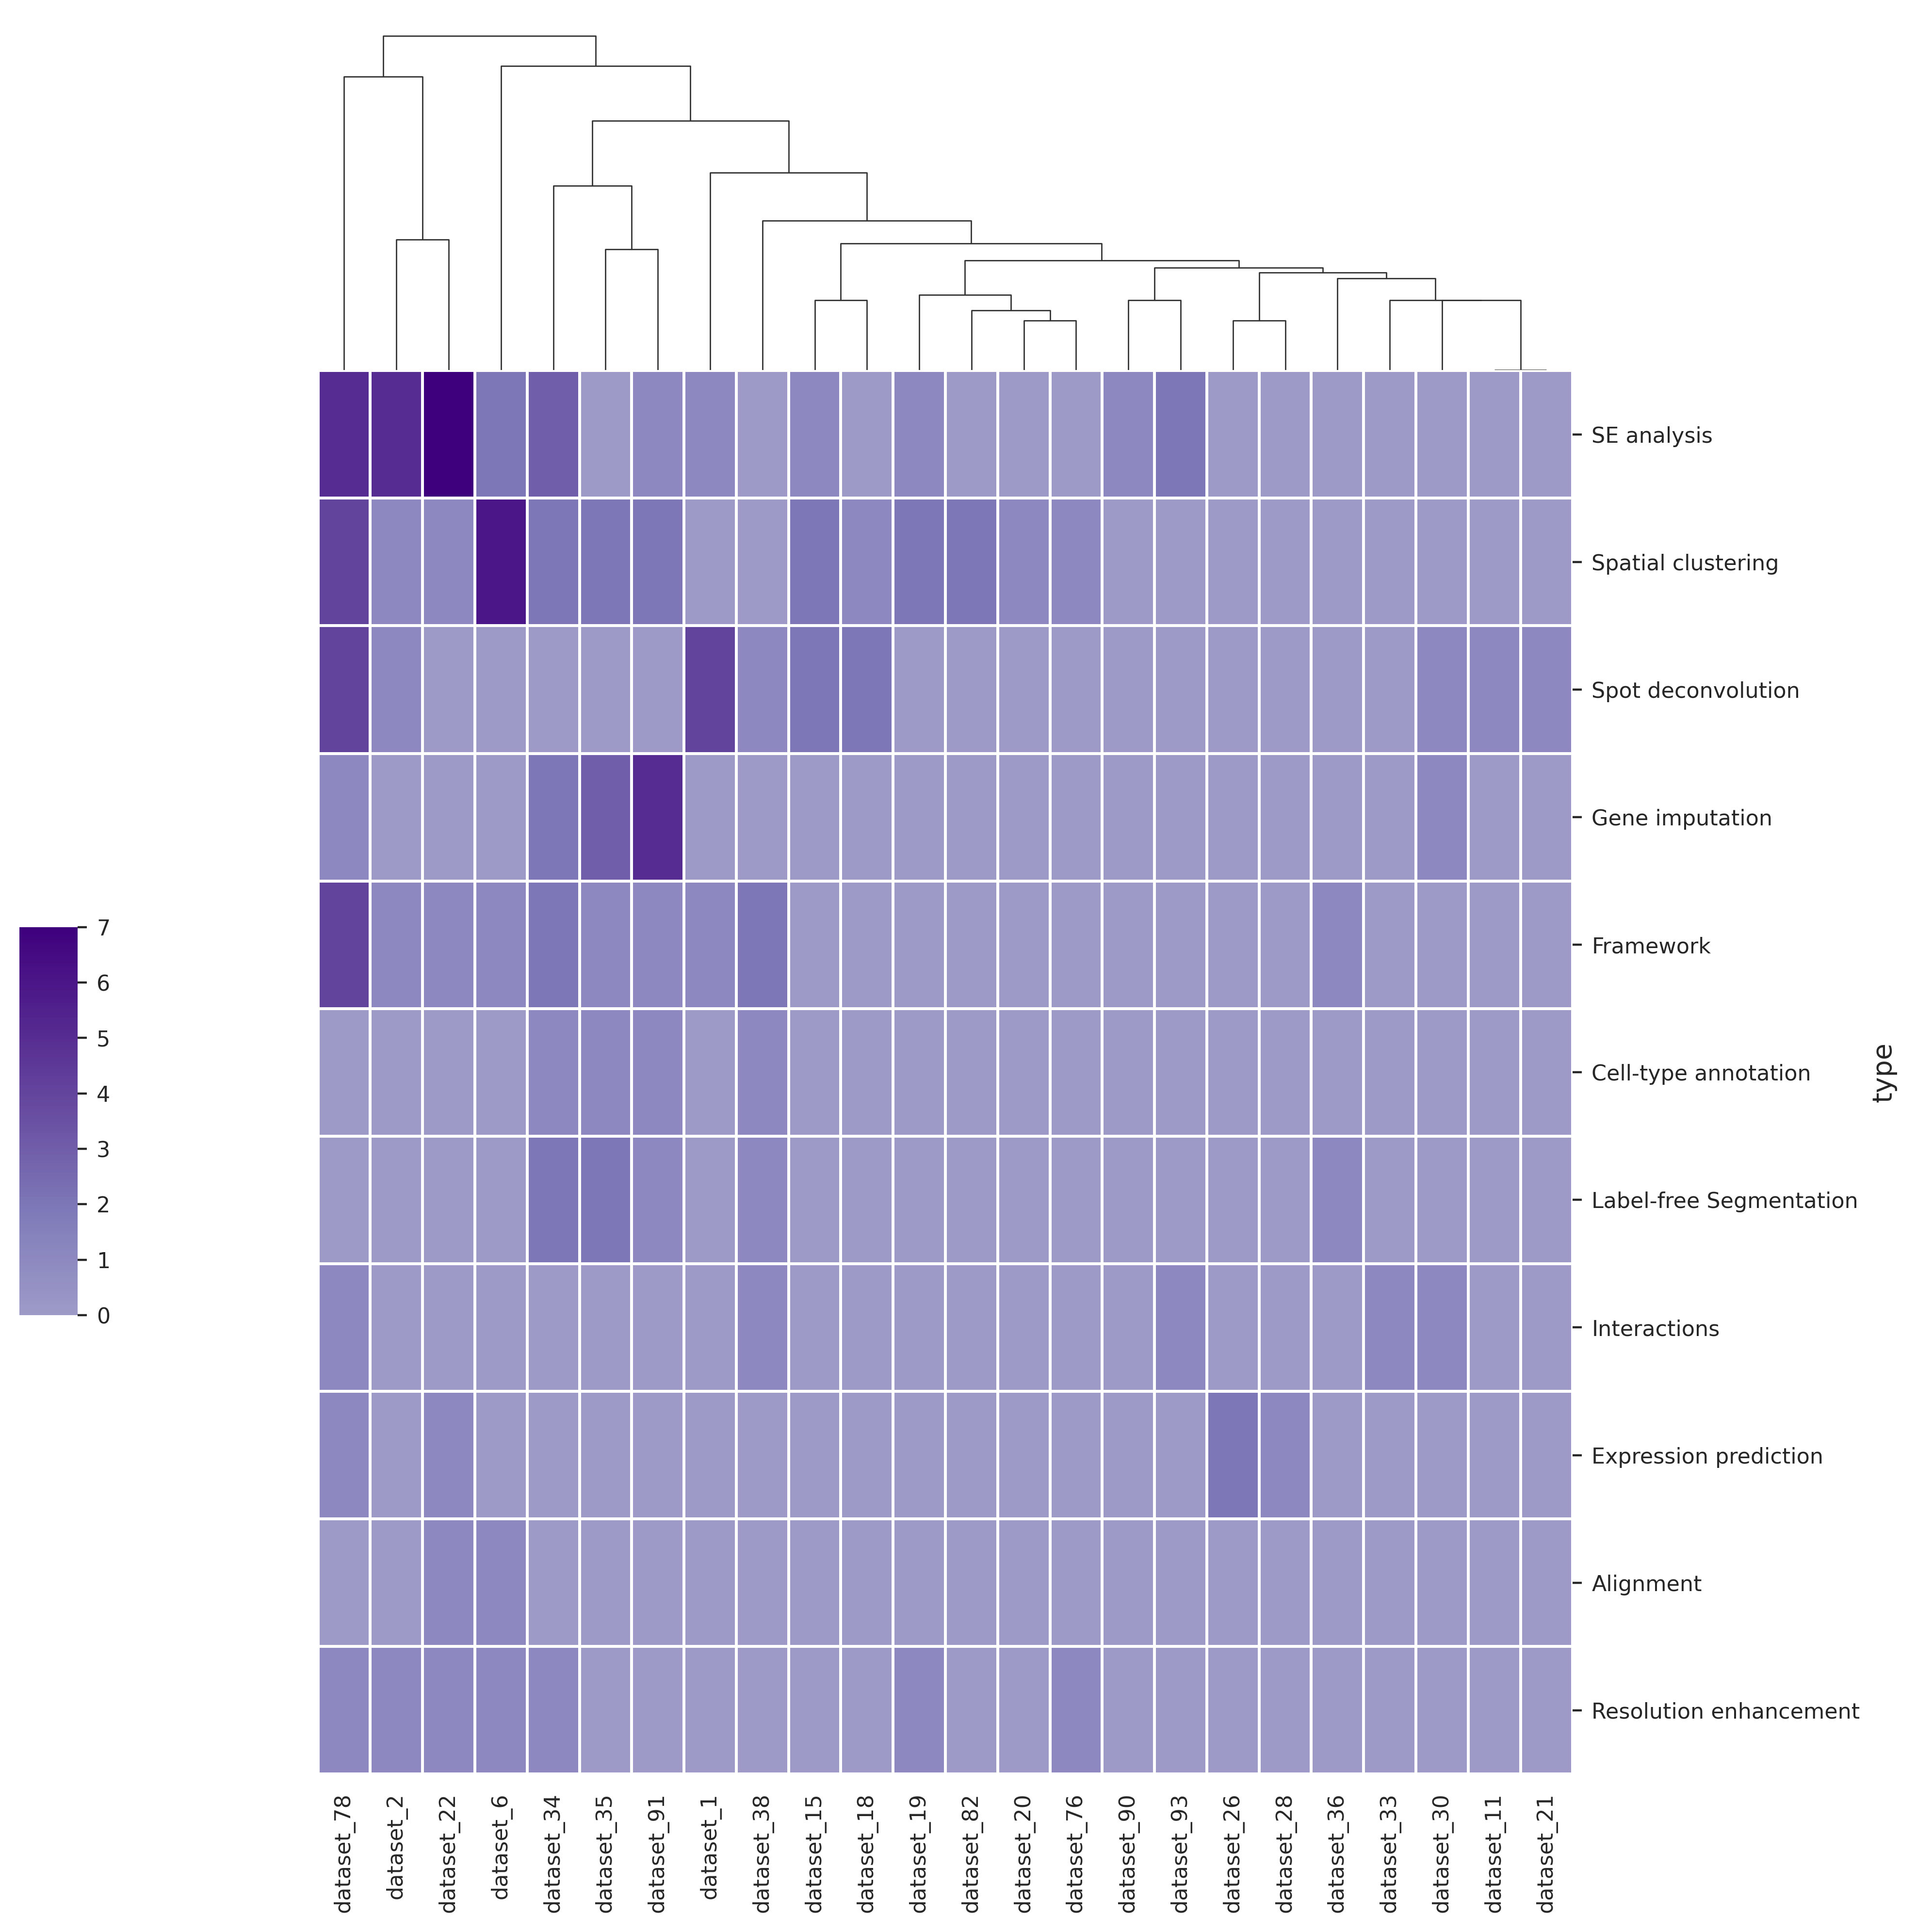

In [54]:
# cmp = palettable.cmocean.sequential.Amp_20.mpl_colormap
g = sns.clustermap(dataset_count, 
                   center=0, 
                   # cmap='vlag',
                                      cmap='Purples',


                   # row_colors=network_colors, col_colors=network_colors,
                   # col_colors=cmp_biotech_name,
                   square=True,
                   # dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, 
                   # figsize=(12, 13)
                  )

g.ax_row_dendrogram.remove()

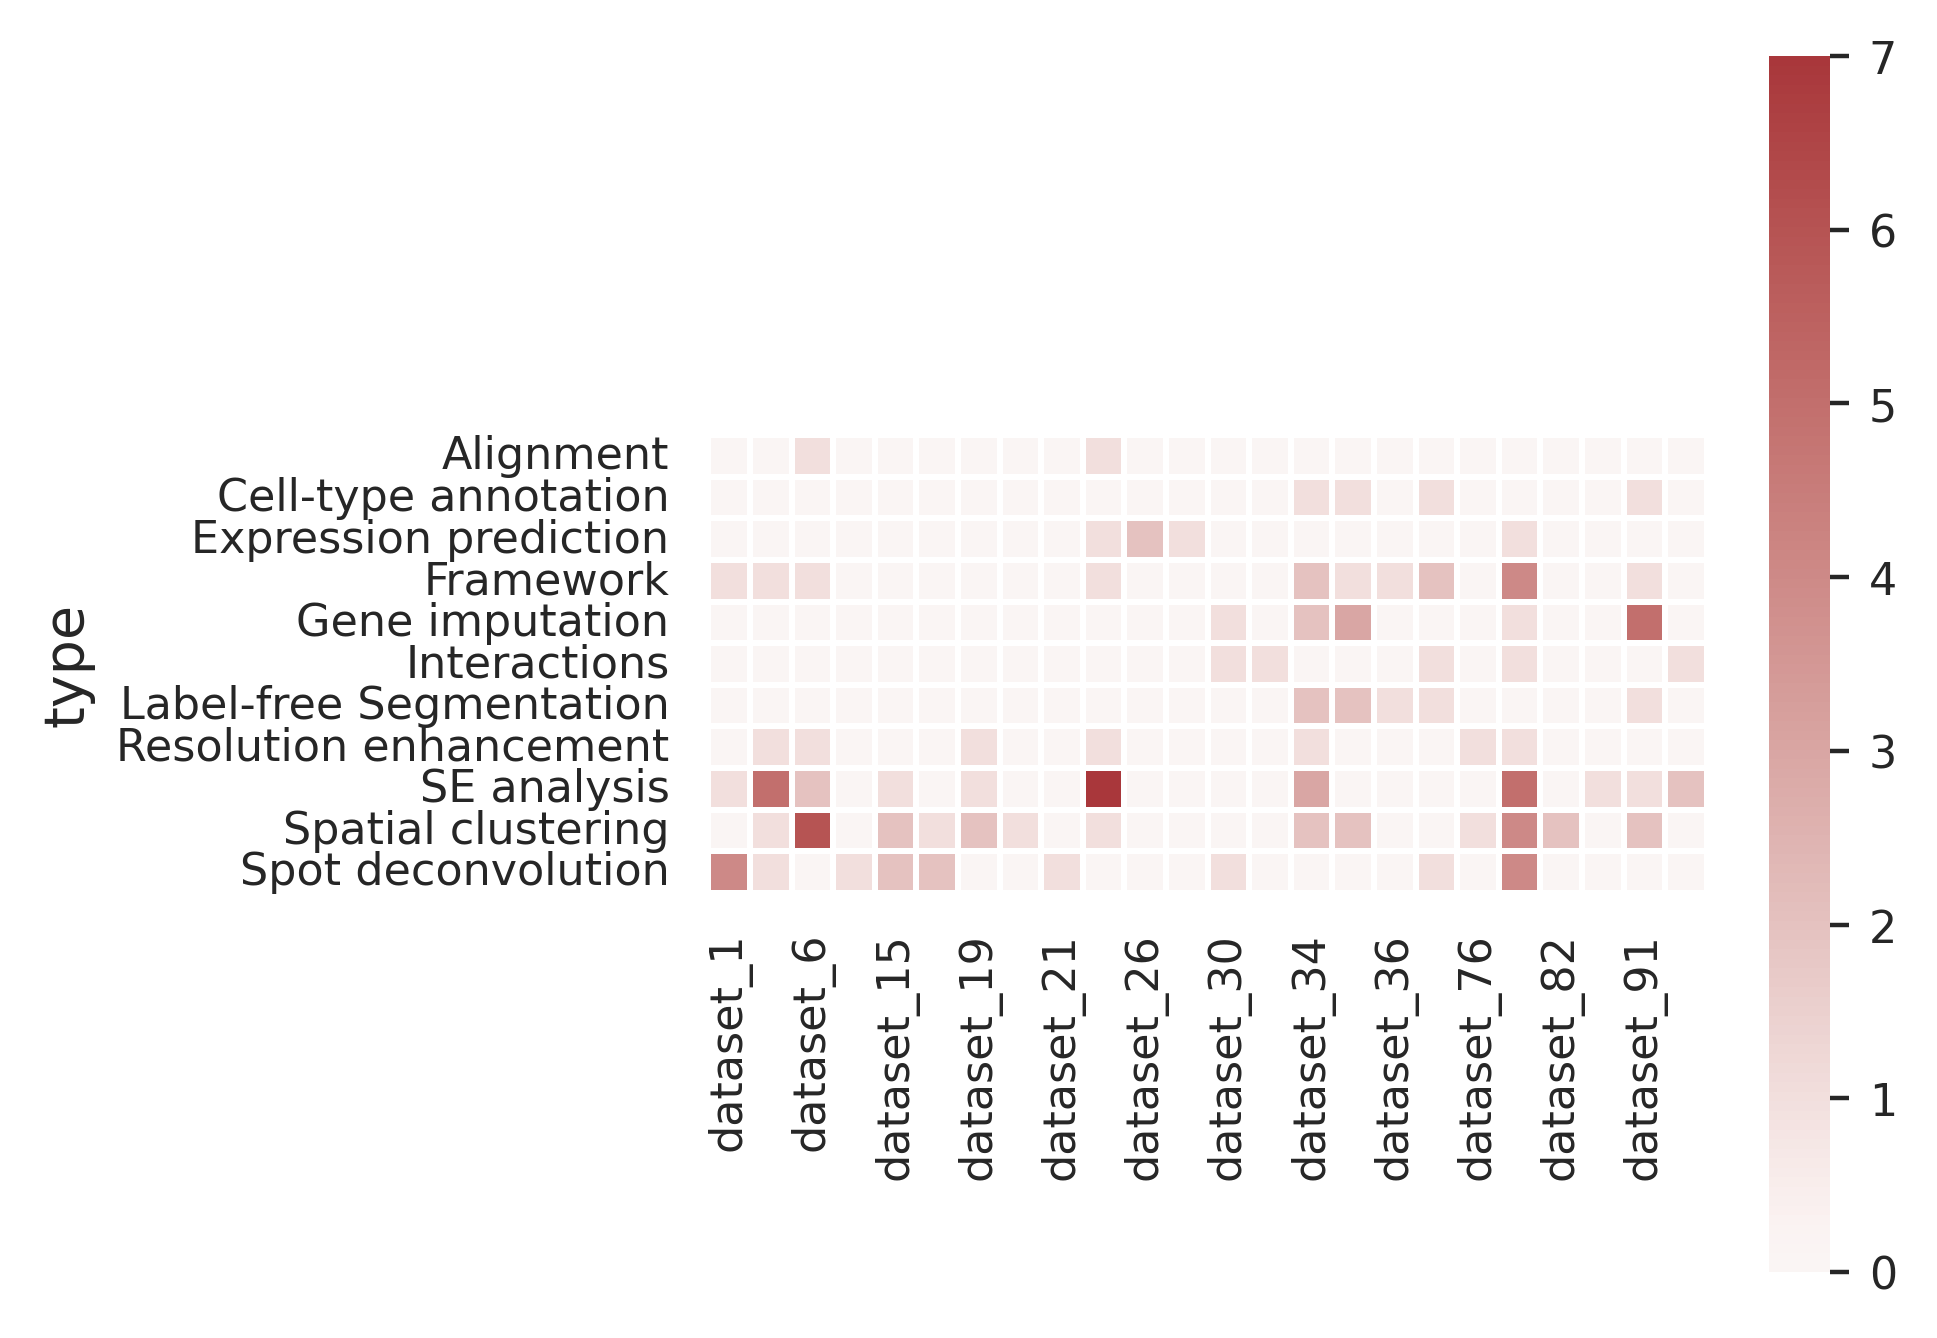

In [52]:
# cmp = palettable.cmocean.sequential.Amp_20.mpl_colormap
g = sns.heatmap(dataset_count, 
                   center=0, 
                   cmap='vlag',
                   # row_colors=network_colors, col_colors=network_colors,
                   # col_colors=cmp_biotech_name,
                   square=True,
                   
                   # cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, 
                   # figsize=(12, 13)
                  )

# g.ax_row_dendrogram.remove()

In [23]:
dataset_info = pd.read_feather('dataset.feather')

In [48]:
dataset_info.index==

,index,Name_Short,Name_Long,Biotech_ID,doi,Date,Country,Journal,Author,Access,Zip_Path,data_count,N_Unit,N_Gene,Species,N_Unit_log,N_Gene_log,biotech_name,biotech_type,data_count_trun_100
0,0,chen2021dissecting,Dissecting mammalian spermatogenesis using spa...,25,https://doi.org/10.1016/j.celrep.2021.109915,2021-11-04,USA,Cell Reports,"Chen, H.\nMurray, E.\nSinha, A.\nLaumas, A.\nL...",https://www.dropbox.com/s/ygzpj0d0oh67br0/Test...,demo_data/zip/chen2021dissecting.zip,6,207335,24015.500000,MOUSE,5.316673,4.380492,Slide-seqV2,Spatial Transcriptomics,6
1,1,stickels2020highly,Highly sensitive spatial transcriptomics at ne...,25,10.1038/s41587-020-0739-1,2020-12-07,USA,Nature Biotechnology,"Stickels, Robert R.\nMurray, Evan\nKumar, Pawa...",https://singlecell.broadinstitute.org/single_c...,demo_data/zip/maynard2021transcriptome.zip,6,232963,19429.833333,MOUSE,5.367287,4.288469,Slide-seqV2,Spatial Transcriptomics,6
2,2,rodriques2019slide,Slide-seq: A scalable technology for measuring...,1,10.1126/science.aaw1219,2019-03-29,USA,Science,"Rodriques, S. G.\nStickels, R. R.\nGoeva, A.\n...",https://portals.broadinstitute.org/single_ cel...,demo_data/zip/hunter2021spatially.zip,96,2558150,17349.645833,MOUSE,6.407926,4.239291,Slide-seq,Spatial Transcriptomics,96
3,3,parigi2022the,The spatial transcriptomic landscape of the he...,0,10.1038/s41467-022-28497-0,2022-02-11,USA,Nature Communications,"Parigi, Sara M.\nLarsson, Ludvig\nDas, Srustid...",GSE190595,demo_data/zip/keren2018structured.zip,4,13715,31053.000000,MOUSE,4.137196,4.492104,10X Visium,Spatial Transcriptomics,4
4,4,guilliams2022spatial,Spatial proteogenomics reveals distinct and ev...,0,10.1016/j.cell.2021.12.018,2022-01-13,Belgium,Cell,"Guilliams, M.\nBonnardel, J.\nHaest, B.\nVande...",GSE192742,None,15,24179,31614.666667,MOUSE,4.383438,4.499889,10X Visium,Spatial Transcriptomics,15
5,6,maynard2021trans,Transcriptome-scale spatial gene expression in...,0,10.1038/s41593-020-00787-0,2021-02-10,USA,Nature Neuroscience,"Maynard, K. R.\nCollado-Torres, L.\nWeber, L. ...",http://spatial.libd.org/spatialLIBD/,None,12,47681,33538.000000,HUMAN,4.678345,4.525537,10X Visium,Spatial Transcriptomics,12
6,7,mantri2021spatiotemporal,Spatiotemporal single-cell RNA sequencing of d...,0,10.1038/s41467-021-21892-z,2021-03-21,USA,Nature Communications,"Mantri, M.\nScuderi, G. J.\nAbedini-Nassab, R....",GSE149457,None,4,6596,24356.000000,CHICKEN,3.819281,4.386606,10X Visium,Spatial Transcriptomics,4
7,8,hunter2021spatially,Spatially resolved transcriptomics reveals the...,0,10.1038/s41467-021-26614-z,2021-11-03,USA,Nature Communications,"Hunter, M. V.\nMoncada, R.\nWeiss, J. M.\nYana...",GSE159709,None,3,7281,32268.000000,ZEBRAFISH,3.862191,4.508772,10X Visium,Spatial Transcriptomics,3
8,9,hildebrandt2021spatial,Spatial Transcriptomics to define transcriptio...,0,10.1038/s41467-021-27354-w,2021-12-04,Sweden,Nature Communications,"Hildebrandt, F.\nAndersson, A.\nSaarenpaa, S.\...",https://zenodo.org/record/5595907#.Yk2WZJpByNg,None,12,8746,9655.000000,MOUSE,3.941809,3.984752,10X Visium,Spatial Transcriptomics,12
9,11,fawkner2021spatiotemporal,Spatiotemporal analysis of human intestinal de...,0,10.1016/j.cell.2020.12.016,2021-01-07,UK,Cell,"Fawkner-Corbett, D.\nAntanaviciute, A.\nParikh...",GSE158328,None,8,21192,33538.000000,HUMAN,4.326172,4.525537,10X Visium,Spatial Transcriptomics,8


In [47]:
dataset_count

,index,count,biotech_name,name_short
0,dataset_1,6,"1 Slide-seqV2 Name: biotech_name, dtype: ob...","1 stickels2020highly Name: Name_Short, dtyp..."
1,dataset_2,9,"2 Slide-seq Name: biotech_name, dtype: object","2 rodriques2019slide Name: Name_Short, dtyp..."
2,dataset_6,11,"6 10X Visium Name: biotech_name, dtype: object",6 mantri2021spatiotemporal Name: Name_Short...
3,dataset_11,1,"11 ST Name: biotech_name, dtype: object","11 ortiz2020molecular Name: Name_Short, dty..."
4,dataset_15,5,"15 ST Name: biotech_name, dtype: object","15 asp2019a Name: Name_Short, dtype: object"
5,dataset_18,3,"18 ST Name: biotech_name, dtype: object","18 asp2017spatial Name: Name_Short, dtype: ..."
6,dataset_19,4,"19 ST Name: biotech_name, dtype: object","19 stahl2016visualization Name: Name_Short,..."
7,dataset_20,1,"20 ST Name: biotech_name, dtype: object",20 maniatis2019spatiotemporal Name: Name_Sh...
8,dataset_21,1,"21 ST Name: biotech_name, dtype: object","21 ji2020multimodal Name: Name_Short, dtype..."
9,dataset_22,12,"22 ST Name: biotech_name, dtype: object","22 he2020integrating Name: Name_Short, dtyp..."


In [157]:
method_dataset.columns

Index(['method', 'method_pub', '2', '3', '4', '5', '6', '7', '8', 'is_covered',
       'type', 'dataset_1', 'dataset_2', 'dataset_6', 'dataset_11',
       'dataset_15', 'dataset_18', 'dataset_19', 'dataset_20', 'dataset_21',
       'dataset_22', 'dataset_26', 'dataset_28', 'dataset_30', 'dataset_33',
       'dataset_34', 'dataset_35', 'dataset_36', 'dataset_38', 'dataset_76',
       'dataset_78', 'dataset_82', 'dataset_90', 'dataset_91', 'dataset_93'],
      dtype='object')

In [57]:
biotech_name_list = []
name_short_list = []
for i in range(len(dataset_count)):
    cur_dataset_idx = dataset_count.iloc[i]['index'].split('_')[1]
    if cur_dataset_idx=='93':
        cur_biotech_name = 'seqFISH'
        cur_name_short = 'Shah2016InSitu'
    elif cur_dataset_idx=='78':
        cur_biotech_name = '10X Visium'
        cur_name_short = '10Xgenomics'


    else:

        cur_row = dataset_info[dataset_info['index']==int(cur_dataset_idx)]

        cur_biotech_name = cur_row['biotech_name'].values[0]
        cur_name_short = cur_row['Name_Short'].values[0]
    print(cur_dataset_idx,cur_biotech_name,cur_name_short)


    biotech_name_list.append(cur_biotech_name)
    name_short_list.append(cur_name_short)

1 Slide-seqV2 stickels2020highly
2 Slide-seq rodriques2019slide
6 10X Visium maynard2021trans
11 10X Visium fawkner2021spatiotemporal
15 ST moncada2020integrating
18 ST asp2019a
19 ST thrane2018spatially
20 ST berglund2018spatial
21 ST asp2017spatial
22 ST stahl2016visualization
26 ST he2020integrating
28 10X Visium bergenstrahle2021super
30 MERFISH zhang2021spatially
33 MERFISH xia2019spatial
34 MERFISH moffitt2018molecular
35 osmFISH codeluppi2018spatial
36 seqFISH lohoff2021integration
38 seqFISH+ eng2019transcriptome
76 DBiT-seq liu2020high
78 10X Visium 10Xgenomics
82 Stereo-seq chen2022spatiotemporal
90 HDST Vickovic2019high
91 STARmap Wang2018three
93 seqFISH Shah2016InSitu


In [58]:
dataset_count['biotech_name'] = biotech_name_list
dataset_count['name_short'] = name_short_list
dataset_count = dataset_count.rename(columns={0:'count'})

In [59]:
dataset_count

,index,count,biotech_name,name_short
0,dataset_1,6,Slide-seqV2,stickels2020highly
1,dataset_2,9,Slide-seq,rodriques2019slide
2,dataset_6,11,10X Visium,maynard2021trans
3,dataset_11,1,10X Visium,fawkner2021spatiotemporal
4,dataset_15,5,ST,moncada2020integrating
5,dataset_18,3,ST,asp2019a
6,dataset_19,4,ST,thrane2018spatially
7,dataset_20,1,ST,berglund2018spatial
8,dataset_21,1,ST,asp2017spatial
9,dataset_22,12,ST,stahl2016visualization


In [60]:
dataset_count.to_feather('dataset_used_frequency.feather')

In [63]:
dataset_count = dataset_count.sort_values('count',ascending=False)

In [99]:
biotech_name_order = list(np.unique(dataset_count['biotech_name']))

In [98]:
biotech_name_order

array(['10X Visium', 'DBiT-seq', 'HDST', 'MERFISH', 'ST', 'STARmap',
       'Slide-seq', 'Slide-seqV2', 'Stereo-seq', 'osmFISH', 'seqFISH',
       'seqFISH+'], dtype=object)

In [88]:
cmp_biotech_name = palettable.colorbrewer.qualitative.Paired_12.mpl_colors

In [89]:
cmp_biotech_name

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [101]:
color_use

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 0.4980392156862745, 0.0),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (1.0, 1.0, 0.6),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (1.0, 1.0, 0.6),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.984313725490196, 0.603

In [153]:
dataset_count

,index,count,biotech_name,name_short
19,dataset_78,21,10X Visium,10Xgenomics
14,dataset_34,13,MERFISH,moffitt2018molecular
9,dataset_22,12,ST,stahl2016visualization
22,dataset_91,11,STARmap,Wang2018three
2,dataset_6,11,10X Visium,maynard2021trans
1,dataset_2,9,Slide-seq,rodriques2019slide
15,dataset_35,9,osmFISH,codeluppi2018spatial
0,dataset_1,6,Slide-seqV2,stickels2020highly
17,dataset_38,6,seqFISH+,eng2019transcriptome
4,dataset_15,5,ST,moncada2020integrating


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


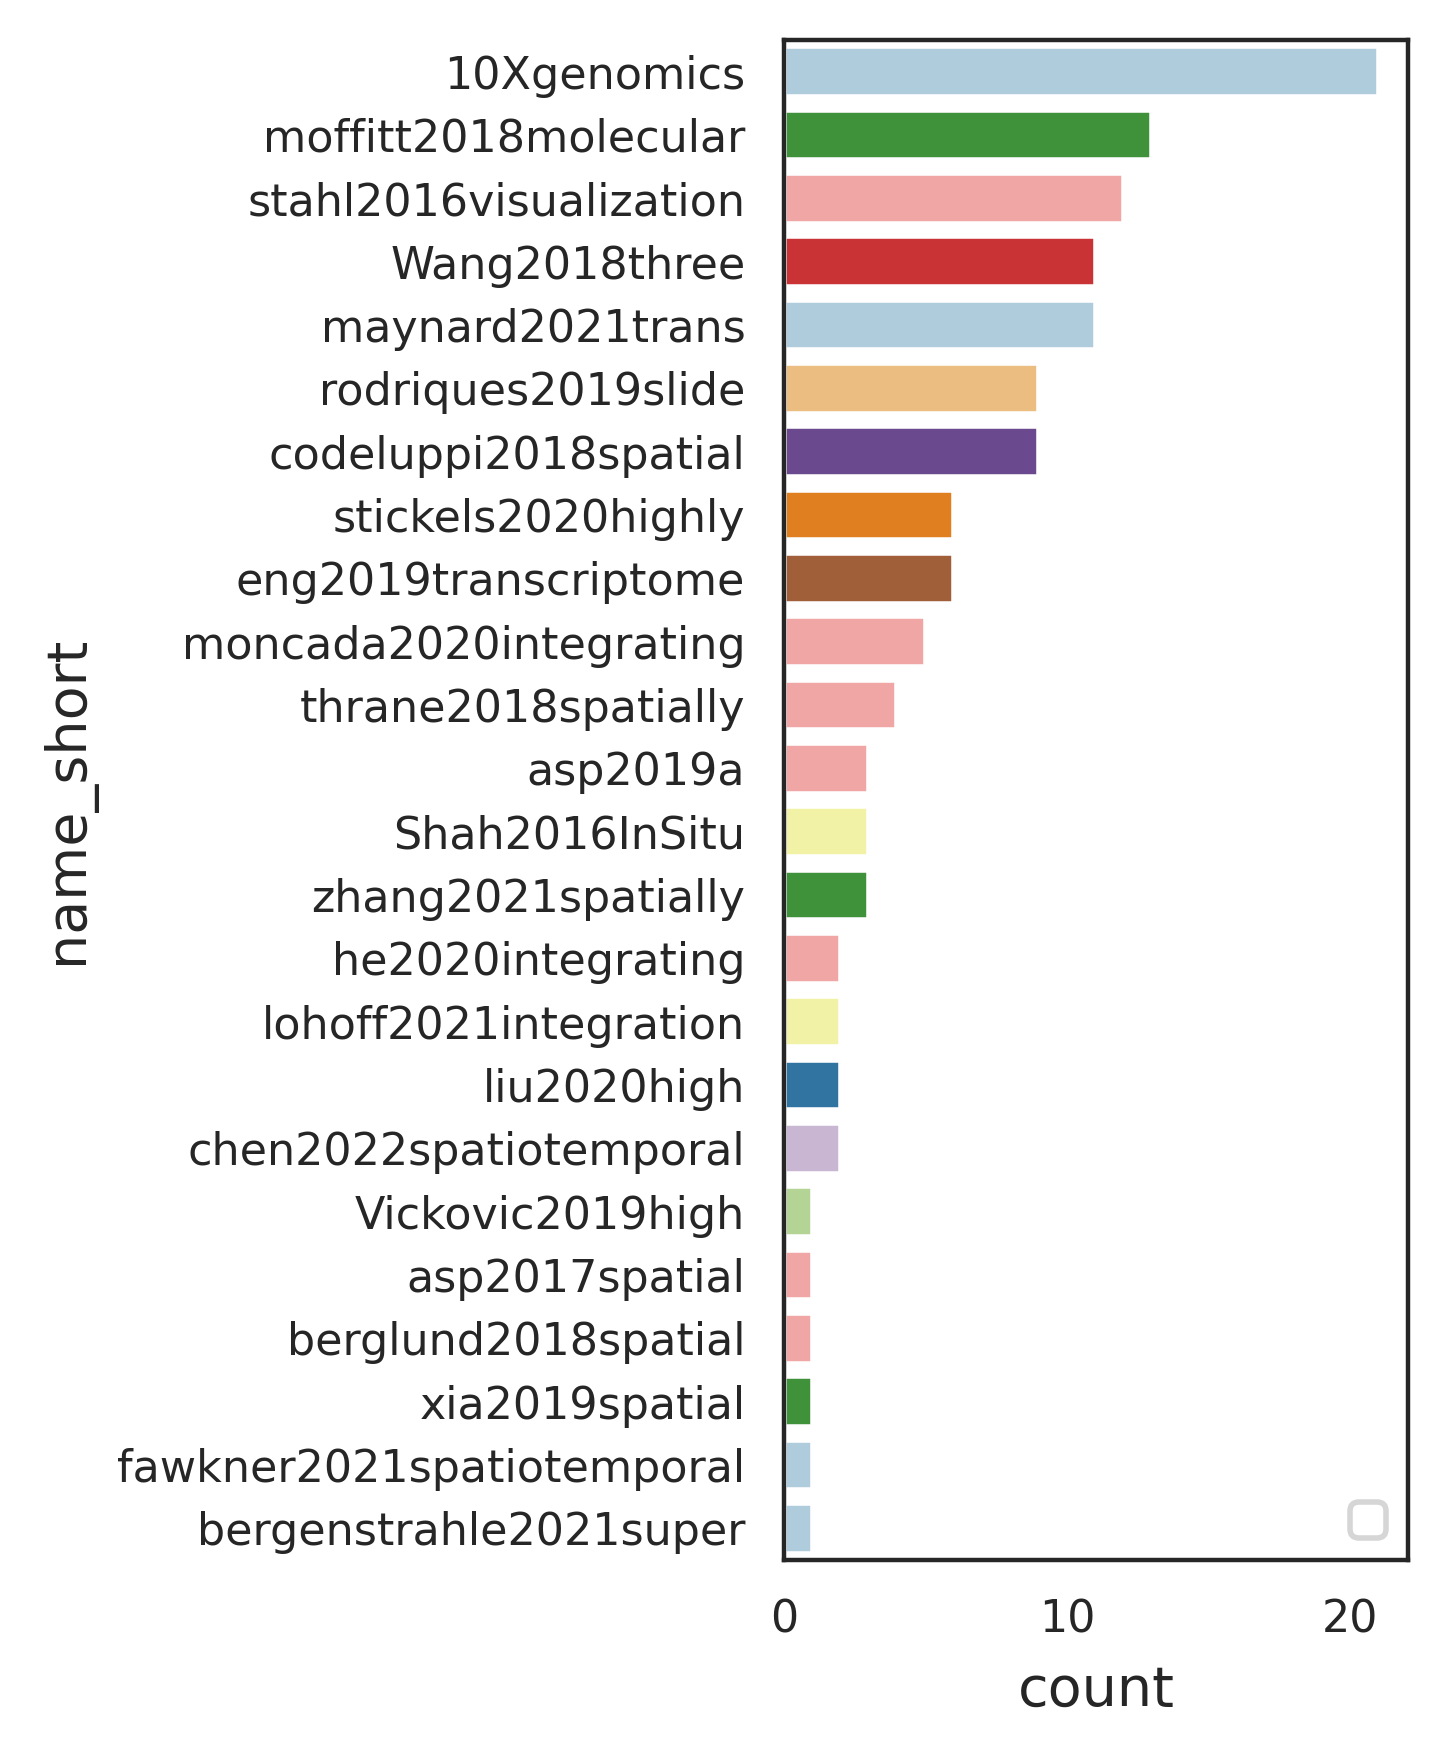

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(2,5))


color_use = [cmp_biotech_name[biotech_name_order.index(bn)] for bn in dataset_count['biotech_name']]
# Plot the total crashes
# sns.set_color_codes("pastel")
sns.barplot(x="count", y="name_short", data=dataset_count,
            # hue='biotech_name',
            palette=color_use,
            ax=ax
            # palette=cmp_biotech,
            # label="Total",
            # color="r"
           )
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# # Plot the crashes where alcohol was involved
# sns.set_color_codes("muted")
# sns.barplot(x="alcohol", y="abbrev", data=crashes,
#             label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(
#     # xlim=(0, 24), 
#     ylabel="",
#        xlabel="count")
# sns.despine(left=True, bottom=True)

In [124]:
from matplotlib.colors import ListedColormap

In [151]:
cmap = ListedColormap(cmp_biotech_name)


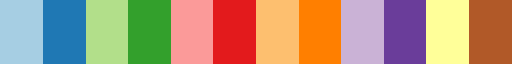

In [152]:
cmap

## show fequency of each methods